<a href="https://colab.research.google.com/github/BasilaThasni/VehicleCoupon_Acceptance_ML_Project/blob/main/VehicleCoupon_Acceptance_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
from google.colab import files  #import the dataset
uploaded = files.upload()

Saving in-vehicle-coupon-recommendation.csv to in-vehicle-coupon-recommendation.csv


In [1]:
#import the required libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.svm import SVC
from xgboost import XGBClassifier
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OrdinalEncoder
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import SelectKBest, f_classif, chi2
from sklearn.feature_selection import SelectKBest, chi2, mutual_info_classif

#LOADING AND PREPROCESSING:

In [5]:
df = pd.read_csv("in-vehicle-coupon-recommendation.csv")

In [6]:
df  #show the dataframe

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12679,Home,Partner,Rainy,55,6PM,Carry out & Take away,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,1,0,1
12680,Work,Alone,Rainy,55,7AM,Carry out & Take away,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,0,1,1
12681,Work,Alone,Snowy,30,7AM,Coffee House,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,1,0,0
12682,Work,Alone,Snowy,30,7AM,Bar,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,1,1,0,1,0


In [7]:
df.shape #show number of columns and rows of the dataset

(12684, 26)

In [8]:
df.describe() #show statistical measures of the dataset


,temperature,has_children,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
count,12684.000000,12684.000000,12684.0,12684.000000,12684.000000,12684.000000,12684.000000,12684.000000
mean,63.301798,0.414144,1.0,0.561495,0.119126,0.214759,0.785241,0.568433
std,19.154486,0.492593,0.0,0.496224,0.323950,0.410671,0.410671,0.495314
min,30.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000
25%,55.000000,0.000000,1.0,0.000000,0.000000,0.000000,1.000000,0.000000
50%,80.000000,0.000000,1.0,1.000000,0.000000,0.000000,1.000000,1.000000
75%,80.000000,1.000000,1.0,1.000000,0.000000,0.000000,1.000000,1.000000
max,80.000000,1.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.000000


In [9]:
df.duplicated().sum() #show number of duplicated rows in the dataset

74

In [10]:
df[df.duplicated()] #show duplicated rows


,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
4192,Work,Alone,Sunny,80,7AM,Carry out & Take away,1d,Male,26,Single,...,never,1~3,less1,less1,1,1,1,0,1,1
4236,Work,Alone,Sunny,80,7AM,Carry out & Take away,1d,Male,26,Single,...,gt8,gt8,4~8,less1,1,1,1,0,1,1
4280,Work,Alone,Sunny,80,7AM,Carry out & Take away,1d,Female,26,Single,...,never,4~8,1~3,less1,1,1,1,0,1,1
4324,Work,Alone,Sunny,80,7AM,Carry out & Take away,1d,Female,46,Single,...,never,4~8,1~3,1~3,1,1,1,0,1,1
4409,Work,Alone,Sunny,80,7AM,Carry out & Take away,1d,Female,21,Single,...,never,less1,1~3,never,1,1,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8511,Home,Alone,Sunny,80,6PM,Bar,2h,Male,46,Married partner,...,1~3,1~3,less1,1~3,1,0,0,1,0,1
8512,Home,Partner,Sunny,30,10PM,Carry out & Take away,2h,Male,46,Married partner,...,1~3,1~3,less1,1~3,1,1,0,0,1,1
8513,Work,Alone,Rainy,55,7AM,Restaurant(<20),2h,Male,46,Married partner,...,1~3,1~3,less1,1~3,1,1,1,0,1,0
8515,Work,Alone,Snowy,30,7AM,Restaurant(20-50),1d,Male,46,Married partner,...,1~3,1~3,less1,1~3,1,1,1,0,1,0


In [11]:
df.drop_duplicates(inplace=True,ignore_index=True) #remove duplicated rows

In [12]:
df.duplicated().sum() #show number of duplicated rows again

0

In [13]:
df.shape #show shape again

(12610, 26)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12610 entries, 0 to 12609
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12610 non-null  object
 1   passanger             12610 non-null  object
 2   weather               12610 non-null  object
 3   temperature           12610 non-null  int64 
 4   time                  12610 non-null  object
 5   coupon                12610 non-null  object
 6   expiration            12610 non-null  object
 7   gender                12610 non-null  object
 8   age                   12610 non-null  object
 9   maritalStatus         12610 non-null  object
 10  has_children          12610 non-null  int64 
 11  education             12610 non-null  object
 12  occupation            12610 non-null  object
 13  income                12610 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12503 non-null

##Found that there are only 108 entries in the column 'car'.So,removing the entire column will be suitable since the feature 'car' does not create any impact on vehicle coupon prediction.

In [15]:
df.drop(columns=['car'],inplace = True) #Remove the column 'car'.


In [16]:
df.shape

(12610, 25)

In [17]:
df.isnull().sum() #show numberof null values in each column

,0
destination,0
passanger,0
weather,0
temperature,0
time,0
coupon,0
expiration,0
gender,0
age,0
maritalStatus,0


##Found that there are null values in the columns 'Bar',CoffeeHouse','CarryAway',Restaurantlesstahn20'and 'Restaurant20To50'.

In [18]:
df.dropna(inplace=True) #remove the rows having null values

##Removed the rows having null values.

In [19]:
df.shape

(12007, 25)

In [20]:
df.isnull().sum()


,0
destination,0
passanger,0
weather,0
temperature,0
time,0
coupon,0
expiration,0
gender,0
age,0
maritalStatus,0


##All the null values are removed.

In [21]:
df

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
22,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,1
23,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,0
24,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,1
25,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Male,21,Single,...,less1,4~8,4~8,less1,1,1,0,0,1,0
26,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12605,Home,Partner,Rainy,55,6PM,Carry out & Take away,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,1,0,1
12606,Work,Alone,Rainy,55,7AM,Carry out & Take away,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,0,1,1
12607,Work,Alone,Snowy,30,7AM,Coffee House,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,1,0,0
12608,Work,Alone,Snowy,30,7AM,Bar,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,1,1,0,1,0


In [22]:
df.reset_index(drop=True,inplace=True) #reset the index

In [23]:
df #show the df after reseting the index

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Male,21,Single,...,less1,4~8,4~8,less1,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12002,Home,Partner,Rainy,55,6PM,Carry out & Take away,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,1,0,1
12003,Work,Alone,Rainy,55,7AM,Carry out & Take away,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,0,1,1
12004,Work,Alone,Snowy,30,7AM,Coffee House,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,1,0,0
12005,Work,Alone,Snowy,30,7AM,Bar,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,1,1,0,1,0


In [24]:
#show the names of the columns with categorical data.
categorical_columns = df.select_dtypes(include=['object']).columns
print(list(categorical_columns))

['destination', 'passanger', 'weather', 'time', 'coupon', 'expiration', 'gender', 'age', 'maritalStatus', 'education', 'occupation', 'income', 'Bar', 'CoffeeHouse', 'CarryAway', 'RestaurantLessThan20', 'Restaurant20To50']


In [25]:
print(len(categorical_columns)) #show the number of categorical columns.

17


##There are 17 columns with categorical data.

In [26]:
#show the names of the columns having numerical columns.
numerical_columns = df.select_dtypes(include=['number']).columns
print(list(numerical_columns))


['temperature', 'has_children', 'toCoupon_GEQ5min', 'toCoupon_GEQ15min', 'toCoupon_GEQ25min', 'direction_same', 'direction_opp', 'Y']


##The columns except 'temperature' are binary features.

##There are 7 columns with binary data and one column with numerical data.

In [27]:
categorical_df = df[categorical_columns]
numerical_df = df[numerical_columns]

In [28]:
for x in categorical_df.columns:
    print(f"{x}': {categorical_df[x].unique()}\n")


destination': ['No Urgent Place' 'Home' 'Work']

passanger': ['Alone' 'Friend(s)' 'Kid(s)' 'Partner']

weather': ['Sunny' 'Rainy' 'Snowy']

time': ['2PM' '10AM' '6PM' '7AM' '10PM']

coupon': ['Restaurant(<20)' 'Coffee House' 'Bar' 'Carry out & Take away'
 'Restaurant(20-50)']

expiration': ['1d' '2h']

gender': ['Male' 'Female']

age': ['21' '46' '26' '31' '41' '50plus' '36' 'below21']

maritalStatus': ['Single' 'Married partner' 'Unmarried partner' 'Divorced' 'Widowed']

education': ['Bachelors degree' 'Some college - no degree' 'Associates degree'
 'High School Graduate' 'Graduate degree (Masters or Doctorate)'
 'Some High School']

occupation': ['Architecture & Engineering' 'Student' 'Education&Training&Library'
 'Unemployed' 'Healthcare Support' 'Healthcare Practitioners & Technical'
 'Sales & Related' 'Management' 'Arts Design Entertainment Sports & Media'
 'Computer & Mathematical' 'Life Physical Social Science'
 'Personal Care & Service' 'Office & Administrative Support'
 'Const

In [29]:
df['temperature'].unique() #shows the unique values in the numerical column 'temperature'.


array([55, 80, 30])

##As there is only a numerical column,no need of outlier detection.And the only one numerical column has only 3 unique values.

In [30]:
categorical_df

,destination,passanger,weather,time,coupon,expiration,gender,age,maritalStatus,education,occupation,income,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50
0,No Urgent Place,Alone,Sunny,2PM,Restaurant(<20),1d,Male,21,Single,Bachelors degree,Architecture & Engineering,$62500 - $74999,never,less1,4~8,4~8,less1
1,No Urgent Place,Friend(s),Sunny,10AM,Coffee House,2h,Male,21,Single,Bachelors degree,Architecture & Engineering,$62500 - $74999,never,less1,4~8,4~8,less1
2,No Urgent Place,Friend(s),Sunny,10AM,Bar,1d,Male,21,Single,Bachelors degree,Architecture & Engineering,$62500 - $74999,never,less1,4~8,4~8,less1
3,No Urgent Place,Friend(s),Sunny,10AM,Carry out & Take away,2h,Male,21,Single,Bachelors degree,Architecture & Engineering,$62500 - $74999,never,less1,4~8,4~8,less1
4,No Urgent Place,Friend(s),Sunny,2PM,Coffee House,1d,Male,21,Single,Bachelors degree,Architecture & Engineering,$62500 - $74999,never,less1,4~8,4~8,less1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12002,Home,Partner,Rainy,6PM,Carry out & Take away,1d,Male,26,Single,Bachelors degree,Sales & Related,$75000 - $87499,never,never,1~3,4~8,1~3
12003,Work,Alone,Rainy,7AM,Carry out & Take away,1d,Male,26,Single,Bachelors degree,Sales & Related,$75000 - $87499,never,never,1~3,4~8,1~3
12004,Work,Alone,Snowy,7AM,Coffee House,1d,Male,26,Single,Bachelors degree,Sales & Related,$75000 - $87499,never,never,1~3,4~8,1~3
12005,Work,Alone,Snowy,7AM,Bar,1d,Male,26,Single,Bachelors degree,Sales & Related,$75000 - $87499,never,never,1~3,4~8,1~3


In [31]:
df=df.rename(columns={"passanger":"passenger"}) #renamed 'passanger' to 'passenger' for better understanding.
df

,destination,passenger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Male,21,Single,...,less1,4~8,4~8,less1,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12002,Home,Partner,Rainy,55,6PM,Carry out & Take away,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,1,0,1
12003,Work,Alone,Rainy,55,7AM,Carry out & Take away,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,0,1,1
12004,Work,Alone,Snowy,30,7AM,Coffee House,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,1,0,0
12005,Work,Alone,Snowy,30,7AM,Bar,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,1,1,0,1,0


#ENCODING

##Ordered features can be encoded using 'OrdinalEncoder'.The ordered features are:
###-age
###-income
###-education
###-CarryAway
###-RestaurantLessThan20
###-Restaurant20To50
###-Bar
###-CoffeHouse


In [32]:
#create lists of orders of each feature.
age_order = ['below21','21','26','31','36','41','46','50plus']
income_order = ['Less than $12500','$12500 - $24999','$25000 - $37499','$37500 - $49999','$50000 - $62499','$62500 - $74999','$75000 - $87499','$87500 - $99999','$100000 or More']
education_order = ['Some High School','High School Graduate','Some college - no degree','Associates degree','Bachelors degree','Graduate degree (Masters or Doctorate)']
restaurant_order = ['never','less1','1~3','4~8','gt8']

In [33]:
#create a dictionary mapping the features with thier orders:
ordered_features = {'age':'age_order',
                    'income':'income_order',
                    'education':'education_order',
                    'RestaurantLessThan20':'restaurant_order',
                    'Restaurant20To50':'restaurant_order',
                    'Bar':'restaurant_order',
                    'CoffeeHouse':'restaurant_order',
                    'CarryAway':'restaurant_order'}

In [34]:
#Pass the category orders to the OrdinalEncoder.
encoder = OrdinalEncoder(categories=[globals()[ordered_features[col]] for col in ordered_features])


In [35]:
# Apply OrdinalEncoder to the specified columns

df[list(ordered_features.keys())] = encoder.fit_transform(df[list(ordered_features.keys())])

In [36]:
print(df[ordered_features.keys()].head())

   age  income  education  RestaurantLessThan20  Restaurant20To50  Bar  \
0  1.0     5.0        4.0                   3.0               1.0  0.0   
1  1.0     5.0        4.0                   3.0               1.0  0.0   
2  1.0     5.0        4.0                   3.0               1.0  0.0   
3  1.0     5.0        4.0                   3.0               1.0  0.0   
4  1.0     5.0        4.0                   3.0               1.0  0.0   

   CoffeeHouse  CarryAway  
0          1.0        3.0  
1          1.0        3.0  
2          1.0        3.0  
3          1.0        3.0  
4          1.0        3.0  


In [37]:
df

,destination,passenger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Male,1.0,Single,...,1.0,3.0,3.0,1.0,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Male,1.0,Single,...,1.0,3.0,3.0,1.0,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,1.0,Single,...,1.0,3.0,3.0,1.0,1,0,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Male,1.0,Single,...,1.0,3.0,3.0,1.0,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Male,1.0,Single,...,1.0,3.0,3.0,1.0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12002,Home,Partner,Rainy,55,6PM,Carry out & Take away,1d,Male,2.0,Single,...,0.0,2.0,3.0,2.0,1,0,0,1,0,1
12003,Work,Alone,Rainy,55,7AM,Carry out & Take away,1d,Male,2.0,Single,...,0.0,2.0,3.0,2.0,1,0,0,0,1,1
12004,Work,Alone,Snowy,30,7AM,Coffee House,1d,Male,2.0,Single,...,0.0,2.0,3.0,2.0,1,0,0,1,0,0
12005,Work,Alone,Snowy,30,7AM,Bar,1d,Male,2.0,Single,...,0.0,2.0,3.0,2.0,1,1,1,0,1,0


##The unordered features are encoded using 'OneHotEncoder'.The features are:
###-destination
###-passenger
###-weather
###-time
###-coupon
###-expiration
###-gender
###-maritalStatus
###-occupation

In [38]:
data = {
    'destination': ['No Urgent Place' ,'Home' ,'Work'],
'passenger': ['Alone' ,'Friend(s)' ,'Kid(s)', 'Partner'],
'weather': ['Sunny' ,'Rainy' ,'Snowy'],
'time': ['2PM' ,'10AM' ,'6PM' ,'7AM' ,'10PM'],
'coupon': ['Restaurant(<20)','Coffee House', 'Bar' ,'Carry out & Take away','Restaurant(20-50)'],
'expiration': ['1d' ,'2h'],
'gender': ['Male' ,'Female'],
'maritalStatus': ['Single', 'Married partner' ,'Unmarried partner' ,'Divorced' 'Widowed'],
'occupation': ['Architecture & Engineering' ,'Student', 'Education&Training&Library',
 'Unemployed', 'Healthcare Support', 'Healthcare Practitioners & Technical',
 'Sales & Related' ,'Management', 'Arts Design Entertainment Sports & Media',
 'Computer & Mathematical' ,'Life Physical Social Science',
 'Personal Care & Service', 'Office & Administrative Support',
 'Construction & Extraction', 'Legal' ,'Retired',
 'Community & Social Services' ,'Installation Maintenance & Repair',
 'Transportation & Material Moving', 'Business & Financial',
 'Protective Service' ,'Food Preparation & Serving Related',
 'Production Occupations' ,'Building & Grounds Cleaning & Maintenance',
 'Farming Fishing & Forestry']}

In [39]:
df_encoded = pd.get_dummies(df, columns=['destination', 'passenger', 'weather','time','coupon','expiration','gender','maritalStatus','occupation'], drop_first=True)

In [40]:
df_encoded

,temperature,age,has_children,education,income,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,...,occupation_Management,occupation_Office & Administrative Support,occupation_Personal Care & Service,occupation_Production Occupations,occupation_Protective Service,occupation_Retired,occupation_Sales & Related,occupation_Student,occupation_Transportation & Material Moving,occupation_Unemployed
0,55,1.0,0,4.0,5.0,0.0,1.0,3.0,3.0,1.0,...,False,False,False,False,False,False,False,False,False,False
1,80,1.0,0,4.0,5.0,0.0,1.0,3.0,3.0,1.0,...,False,False,False,False,False,False,False,False,False,False
2,80,1.0,0,4.0,5.0,0.0,1.0,3.0,3.0,1.0,...,False,False,False,False,False,False,False,False,False,False
3,80,1.0,0,4.0,5.0,0.0,1.0,3.0,3.0,1.0,...,False,False,False,False,False,False,False,False,False,False
4,80,1.0,0,4.0,5.0,0.0,1.0,3.0,3.0,1.0,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12002,55,2.0,0,4.0,6.0,0.0,0.0,2.0,3.0,2.0,...,False,False,False,False,False,False,True,False,False,False
12003,55,2.0,0,4.0,6.0,0.0,0.0,2.0,3.0,2.0,...,False,False,False,False,False,False,True,False,False,False
12004,30,2.0,0,4.0,6.0,0.0,0.0,2.0,3.0,2.0,...,False,False,False,False,False,False,True,False,False,False
12005,30,2.0,0,4.0,6.0,0.0,0.0,2.0,3.0,2.0,...,False,False,False,False,False,False,True,False,False,False


#SCALING:

##The one and only numerical feature is scaled using Standardscaler:

In [41]:
temp_scaler = StandardScaler()
df_encoded['temperature'] = temp_scaler.fit_transform(df_encoded[['temperature']])

In [42]:
df_encoded

,temperature,age,has_children,education,income,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,...,occupation_Management,occupation_Office & Administrative Support,occupation_Personal Care & Service,occupation_Production Occupations,occupation_Protective Service,occupation_Retired,occupation_Sales & Related,occupation_Student,occupation_Transportation & Material Moving,occupation_Unemployed
0,-0.433928,1.0,0,4.0,5.0,0.0,1.0,3.0,3.0,1.0,...,False,False,False,False,False,False,False,False,False,False
1,0.872862,1.0,0,4.0,5.0,0.0,1.0,3.0,3.0,1.0,...,False,False,False,False,False,False,False,False,False,False
2,0.872862,1.0,0,4.0,5.0,0.0,1.0,3.0,3.0,1.0,...,False,False,False,False,False,False,False,False,False,False
3,0.872862,1.0,0,4.0,5.0,0.0,1.0,3.0,3.0,1.0,...,False,False,False,False,False,False,False,False,False,False
4,0.872862,1.0,0,4.0,5.0,0.0,1.0,3.0,3.0,1.0,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12002,-0.433928,2.0,0,4.0,6.0,0.0,0.0,2.0,3.0,2.0,...,False,False,False,False,False,False,True,False,False,False
12003,-0.433928,2.0,0,4.0,6.0,0.0,0.0,2.0,3.0,2.0,...,False,False,False,False,False,False,True,False,False,False
12004,-1.740718,2.0,0,4.0,6.0,0.0,0.0,2.0,3.0,2.0,...,False,False,False,False,False,False,True,False,False,False
12005,-1.740718,2.0,0,4.0,6.0,0.0,0.0,2.0,3.0,2.0,...,False,False,False,False,False,False,True,False,False,False


In [43]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12007 entries, 0 to 12006
Data columns (total 61 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   temperature                                           12007 non-null  float64
 1   age                                                   12007 non-null  float64
 2   has_children                                          12007 non-null  int64  
 3   education                                             12007 non-null  float64
 4   income                                                12007 non-null  float64
 5   Bar                                                   12007 non-null  float64
 6   CoffeeHouse                                           12007 non-null  float64
 7   CarryAway                                             12007 non-null  float64
 8   RestaurantLessThan20                                  12

In [44]:
correlation_matrix = df_encoded.corr()
correlation_matrix

,temperature,age,has_children,education,income,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,...,occupation_Management,occupation_Office & Administrative Support,occupation_Personal Care & Service,occupation_Production Occupations,occupation_Protective Service,occupation_Retired,occupation_Sales & Related,occupation_Student,occupation_Transportation & Material Moving,occupation_Unemployed
temperature,1.000000,-0.012817,-0.019496,0.011123,-0.023571,0.002155,-0.016415,0.012820,0.031214,-0.026109,...,0.045417,-0.015069,-0.014366,-0.013973,0.024792,0.028368,-0.007001,0.020331,0.002129,-0.032694
age,-0.012817,1.000000,0.437749,0.164928,0.078312,-0.162388,-0.053268,-0.061008,0.005138,-0.001320,...,0.055013,0.009906,0.129120,0.079938,0.019724,0.309698,-0.002690,-0.391889,0.076507,-0.081053
has_children,-0.019496,0.437749,1.000000,0.090558,0.099226,-0.205927,0.034822,-0.063051,-0.031058,-0.012380,...,0.040702,-0.059011,0.104892,-0.027104,-0.008703,0.112076,-0.052533,-0.212160,0.051859,-0.008516
education,0.011123,0.164928,0.090558,1.000000,0.301799,0.041232,0.099271,-0.044642,0.085309,0.041148,...,0.096623,-0.079659,-0.023645,-0.091009,-0.047053,0.071122,-0.025817,-0.150403,-0.066149,-0.112747
income,-0.023571,0.078312,0.099226,0.301799,1.000000,0.043793,-0.020163,0.023319,0.110467,0.166791,...,0.078358,-0.073882,0.043613,-0.066695,0.029866,0.008201,-0.059855,-0.119602,-0.002242,-0.089718
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
occupation_Retired,0.028368,0.309698,0.112076,0.071122,0.008201,-0.133088,-0.078258,-0.078471,0.007768,-0.039048,...,-0.052341,-0.046989,-0.022956,-0.017263,-0.024502,1.000000,-0.063104,-0.076026,-0.027477,-0.084992
occupation_Sales & Related,-0.007001,-0.002690,-0.052533,-0.025817,-0.059855,-0.019159,-0.051718,-0.006486,-0.021932,-0.032550,...,-0.080897,-0.072624,-0.035480,-0.026681,-0.037870,-0.063104,1.000000,-0.117504,-0.042468,-0.131362
occupation_Student,0.020331,-0.391889,-0.212160,-0.150403,-0.119602,-0.021492,0.116038,0.005487,-0.015483,-0.033328,...,-0.097463,-0.087496,-0.042746,-0.032144,-0.045626,-0.076026,-0.117504,1.000000,-0.051165,-0.158262
occupation_Transportation & Material Moving,0.002129,0.076507,0.051859,-0.066149,-0.002242,0.008244,-0.008925,0.010003,0.058181,-0.012368,...,-0.035225,-0.031623,-0.015449,-0.011617,-0.016490,-0.027477,-0.042468,-0.051165,1.000000,-0.057199


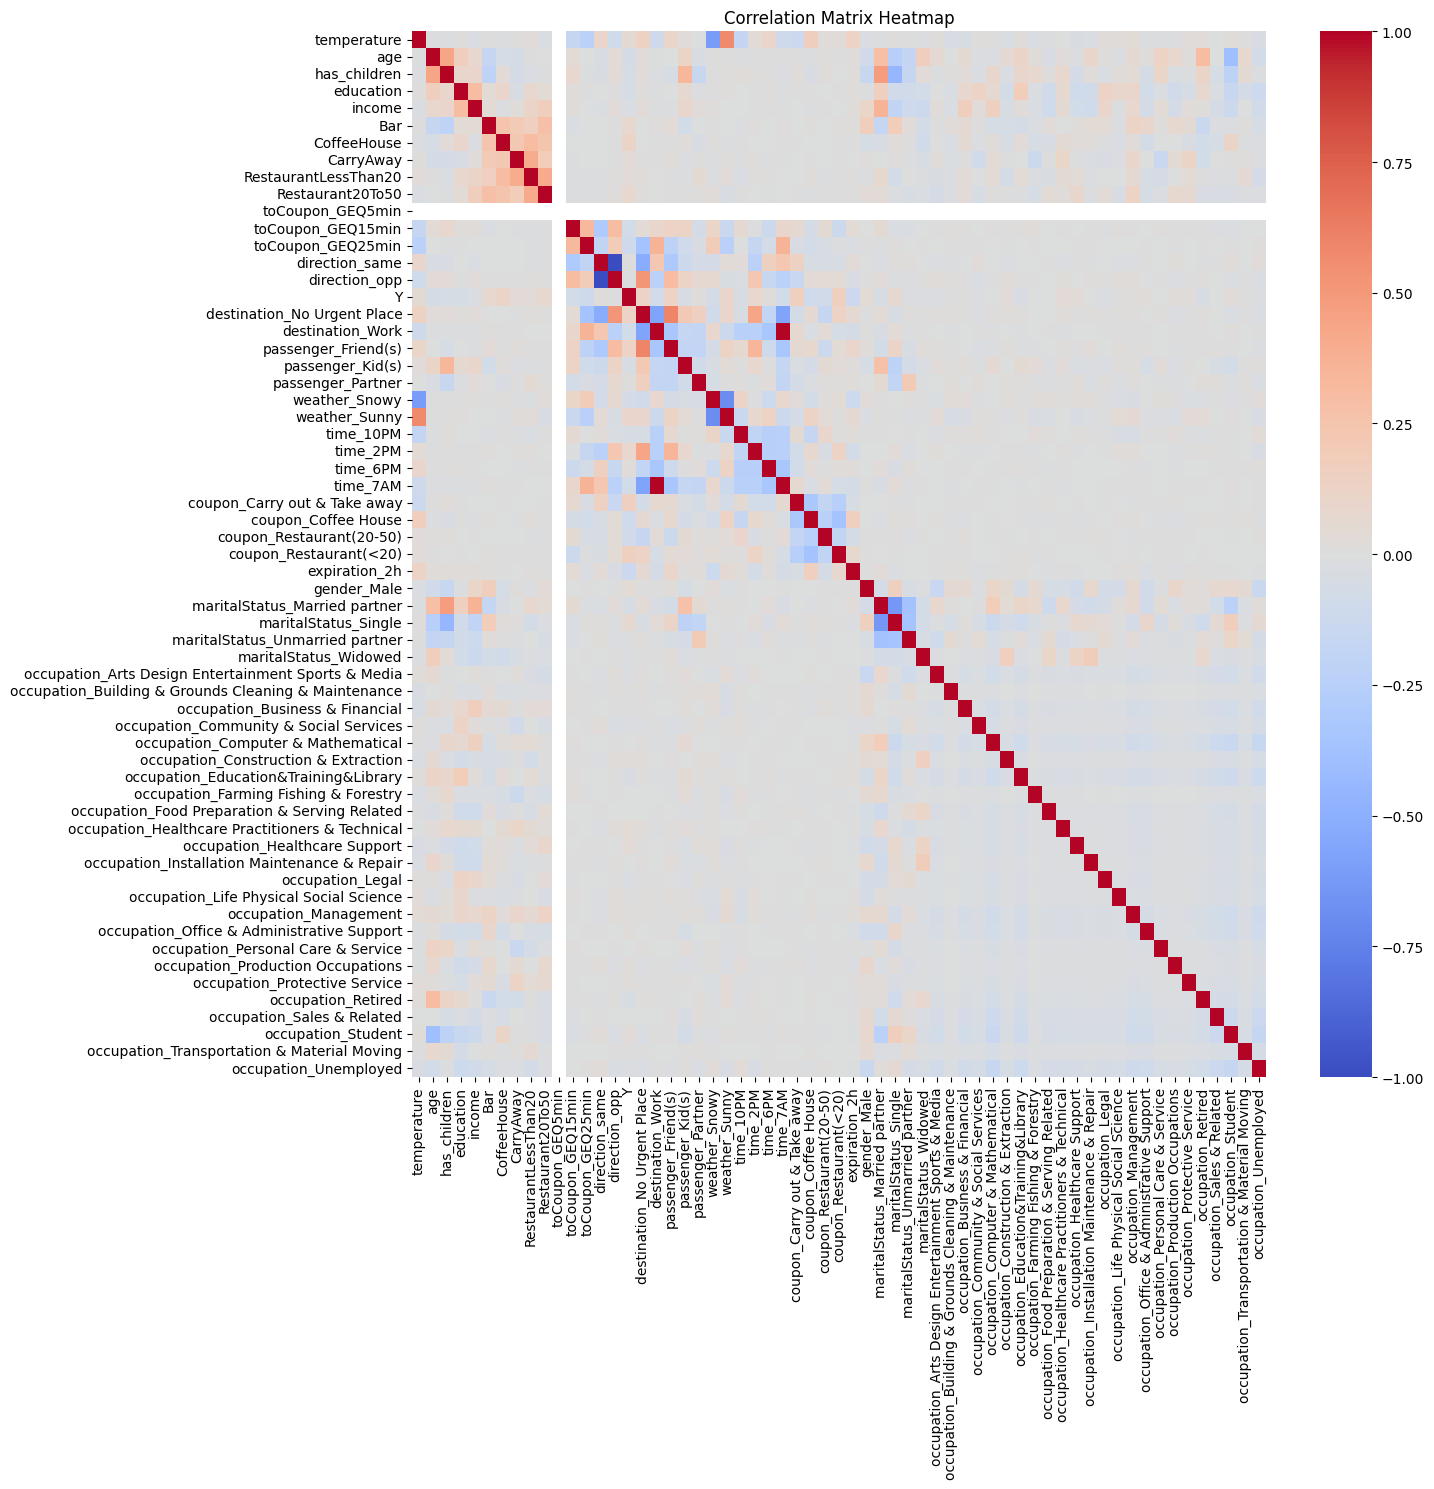

In [45]:
plt.figure(figsize=(15, 15))
sns.heatmap(correlation_matrix,annot=False, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix Heatmap")
plt.tight_layout()
plt.show()

##Inference from the correlation matrix:
###The columns 'Bar','CoffeeHouse',Destination_No Urgent Place','passenger_Friend(s)','weather_Sunny',Coupon_Carry out & Take Away','Coupon_Restaurant(<20)'and 'temperature' **show positive correlation which is  weak'**.

###The columns 'expiration_2h','Coupon_Restaurant(20To50)','Coupon_Coffeehouse','MaritalStatus_Marriedpartner','age','income','has_children' and 'education' **show negative correlation which is weak**.

In [46]:
#Selecting the features which shows colour on the correlation matrix.
#The features are : "income","education","age","maritalStatus_Widowed","coupon_Restaurant(<20)","expiration_2h","coupon_Restaurant(20To50)","coupon_Carry out & Take away","time_2PM","weather_Sunny","passenger_Friend(s)","destination_No Urgent Place","Restaurant20To50","CoffeeHouse","Bar","coupon_CoffeeHouse","weather_Snowy","passenger_Kid(s)","toCoupon_GEQ5min","toCoupon_GEQ25min".
#Create a new dataframe which contains only the selected features:
selected_df = df_encoded[["income","education","age","maritalStatus_Widowed","coupon_Restaurant(<20)","expiration_2h","coupon_Restaurant(20-50)","coupon_Carry out & Take away","time_2PM","weather_Sunny","passenger_Friend(s)","destination_No Urgent Place","Restaurant20To50","CoffeeHouse","Bar","coupon_Coffee House","weather_Snowy","passenger_Kid(s)","toCoupon_GEQ5min","toCoupon_GEQ25min","Y"]]
selected_df.rename(columns = {'Y':'Coupon_Acceptance'}, inplace = True)
selected_df

<ipython-input-46-d69f97860276>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_df.rename(columns = {'Y':'Coupon_Acceptance'}, inplace = True)


,income,education,age,maritalStatus_Widowed,coupon_Restaurant(<20),expiration_2h,coupon_Restaurant(20-50),coupon_Carry out & Take away,time_2PM,weather_Sunny,...,destination_No Urgent Place,Restaurant20To50,CoffeeHouse,Bar,coupon_Coffee House,weather_Snowy,passenger_Kid(s),toCoupon_GEQ5min,toCoupon_GEQ25min,Coupon_Acceptance
0,5.0,4.0,1.0,False,True,False,False,False,True,True,...,True,1.0,1.0,0.0,False,False,False,1,0,1
1,5.0,4.0,1.0,False,False,True,False,False,False,True,...,True,1.0,1.0,0.0,True,False,False,1,0,0
2,5.0,4.0,1.0,False,False,False,False,False,False,True,...,True,1.0,1.0,0.0,False,False,False,1,0,1
3,5.0,4.0,1.0,False,False,True,False,True,False,True,...,True,1.0,1.0,0.0,False,False,False,1,0,0
4,5.0,4.0,1.0,False,False,False,False,False,True,True,...,True,1.0,1.0,0.0,True,False,False,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12002,6.0,4.0,2.0,False,False,False,False,True,False,False,...,False,2.0,0.0,0.0,False,False,False,1,0,1
12003,6.0,4.0,2.0,False,False,False,False,True,False,False,...,False,2.0,0.0,0.0,False,False,False,1,0,1
12004,6.0,4.0,2.0,False,False,False,False,False,False,False,...,False,2.0,0.0,0.0,True,True,False,1,0,0
12005,6.0,4.0,2.0,False,False,False,False,False,False,False,...,False,2.0,0.0,0.0,False,True,False,1,1,0


In [47]:
selected_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12007 entries, 0 to 12006
Data columns (total 21 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   income                        12007 non-null  float64
 1   education                     12007 non-null  float64
 2   age                           12007 non-null  float64
 3   maritalStatus_Widowed         12007 non-null  bool   
 4   coupon_Restaurant(<20)        12007 non-null  bool   
 5   expiration_2h                 12007 non-null  bool   
 6   coupon_Restaurant(20-50)      12007 non-null  bool   
 7   coupon_Carry out & Take away  12007 non-null  bool   
 8   time_2PM                      12007 non-null  bool   
 9   weather_Sunny                 12007 non-null  bool   
 10  passenger_Friend(s)           12007 non-null  bool   
 11  destination_No Urgent Place   12007 non-null  bool   
 12  Restaurant20To50              12007 non-null  float64
 13  C

In [48]:
selected_df.shape

(12007, 21)

In [49]:
#Split the x features and Y feature:
x = selected_df.drop(columns = ["Coupon_Acceptance"])
y = selected_df["Coupon_Acceptance"]

In [50]:
# Initialize SelectKBest with chi-squared test
selector = SelectKBest(mutual_info_classif,k=15)  # 'k' is the number of top features to select

# Fit the selector to the dataset
x_new = selector.fit_transform(x, y)

# Get the selected feature names
selected_features = x.columns[selector.get_support()]
print("Selected Features:", selected_features)

# Display scores for all features
print("Feature Scores:", selector.scores_)


Selected Features: Index(['education', 'age', 'coupon_Restaurant(<20)', 'expiration_2h',
       'coupon_Restaurant(20-50)', 'coupon_Carry out & Take away', 'time_2PM',
       'weather_Sunny', 'passenger_Friend(s)', 'destination_No Urgent Place',
       'Restaurant20To50', 'CoffeeHouse', 'coupon_Coffee House',
       'passenger_Kid(s)', 'toCoupon_GEQ25min'],
      dtype='object')
Feature Scores: [0.         0.00204089 0.0055172  0.         0.00895498 0.01062857
 0.00694785 0.01545034 0.00595912 0.00628757 0.00675255 0.00986861
 0.00647068 0.01659035 0.00038517 0.00721214 0.         0.0072938
 0.         0.00568665]


In [51]:
x_selected  = x[selected_features]
x_selected

,education,age,coupon_Restaurant(<20),expiration_2h,coupon_Restaurant(20-50),coupon_Carry out & Take away,time_2PM,weather_Sunny,passenger_Friend(s),destination_No Urgent Place,Restaurant20To50,CoffeeHouse,coupon_Coffee House,passenger_Kid(s),toCoupon_GEQ25min
0,4.0,1.0,True,False,False,False,True,True,False,True,1.0,1.0,False,False,0
1,4.0,1.0,False,True,False,False,False,True,True,True,1.0,1.0,True,False,0
2,4.0,1.0,False,False,False,False,False,True,True,True,1.0,1.0,False,False,0
3,4.0,1.0,False,True,False,True,False,True,True,True,1.0,1.0,False,False,0
4,4.0,1.0,False,False,False,False,True,True,True,True,1.0,1.0,True,False,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12002,4.0,2.0,False,False,False,True,False,False,False,False,2.0,0.0,False,False,0
12003,4.0,2.0,False,False,False,True,False,False,False,False,2.0,0.0,False,False,0
12004,4.0,2.0,False,False,False,False,False,False,False,False,2.0,0.0,True,False,0
12005,4.0,2.0,False,False,False,False,False,False,False,False,2.0,0.0,False,False,1


In [52]:
#train test split
x_train, x_test, y_train, y_test = train_test_split(x_selected, y, test_size=0.2, random_state=45)

##The SVM model and GradientBoosting model provide the best accuracy(0.69).So,found that SVM and GradientBoosting are the best of the 5 algorithms.
##Since they show only 0.69 accuracy,hyperparameter tuning should be done.

#MODEL IMPLEMENTATION:

Training Logistic Regression:

Logistic Regression Accuracy: 0.6773522064945878
Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.65      0.57      0.61      1046
           1       0.70      0.76      0.73      1356

    accuracy                           0.68      2402
   macro avg       0.67      0.67      0.67      2402
weighted avg       0.67      0.68      0.67      2402

--------------------------------------------------


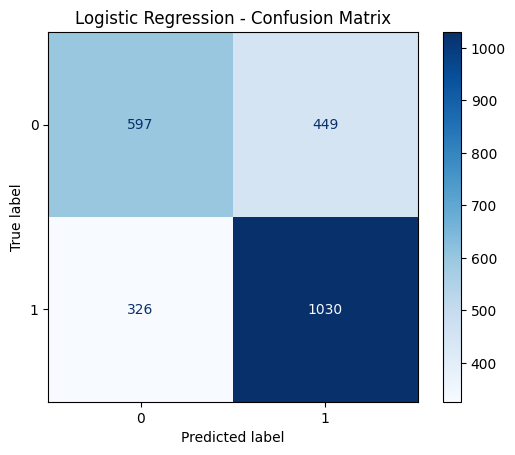

Training Decision Tree:

Decision Tree Accuracy: 0.6598667776852623
Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       0.60      0.66      0.63      1046
           1       0.71      0.66      0.69      1356

    accuracy                           0.66      2402
   macro avg       0.66      0.66      0.66      2402
weighted avg       0.66      0.66      0.66      2402

--------------------------------------------------


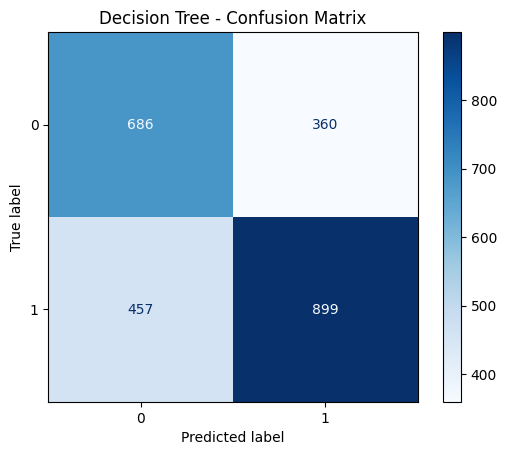

Training Random Forest:

Random Forest Accuracy: 0.6765195670274771
Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.64      0.59      0.61      1046
           1       0.70      0.74      0.72      1356

    accuracy                           0.68      2402
   macro avg       0.67      0.67      0.67      2402
weighted avg       0.67      0.68      0.67      2402

--------------------------------------------------


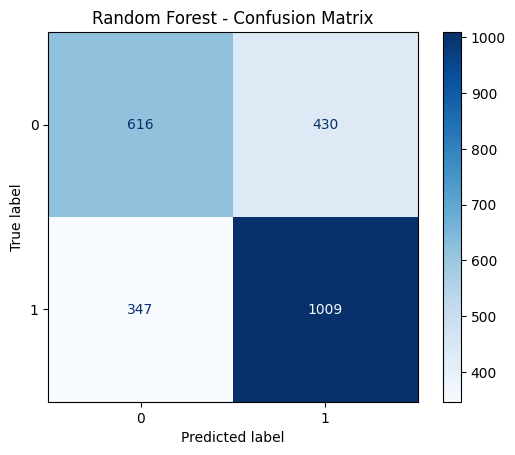

Training SVM:

SVM Accuracy: 0.6994171523730225
SVM Classification Report:
              precision    recall  f1-score   support

           0       0.67      0.61      0.64      1046
           1       0.72      0.77      0.74      1356

    accuracy                           0.70      2402
   macro avg       0.69      0.69      0.69      2402
weighted avg       0.70      0.70      0.70      2402

--------------------------------------------------


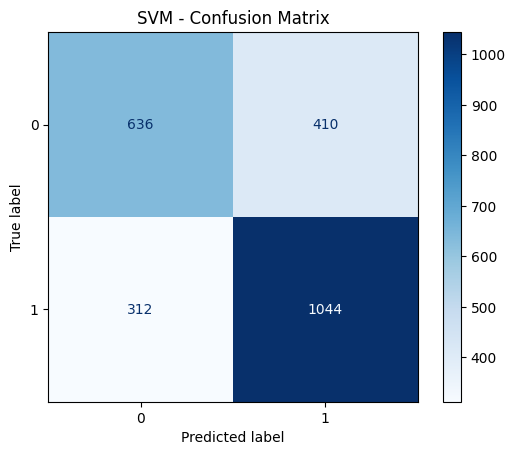

Training GradientBoosting:

GradientBoosting Accuracy: 0.6973355537052456
GradientBoosting Classification Report:
              precision    recall  f1-score   support

           0       0.68      0.59      0.63      1046
           1       0.71      0.78      0.74      1356

    accuracy                           0.70      2402
   macro avg       0.69      0.68      0.69      2402
weighted avg       0.70      0.70      0.69      2402

--------------------------------------------------


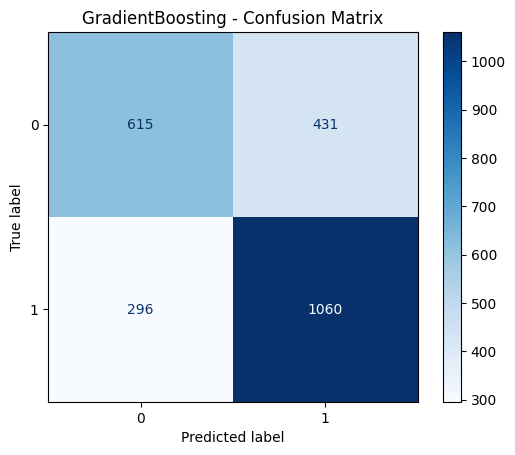


Summary of Results:
Logistic Regression: Accuracy = 0.6774
Decision Tree: Accuracy = 0.6599
Random Forest: Accuracy = 0.6765
SVM: Accuracy = 0.6994
GradientBoosting: Accuracy = 0.6973


In [53]:
# Initialize all classifiers
models = {
    "Logistic Regression": LogisticRegression(max_iter=500),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(n_estimators=100),
    "SVM": SVC(kernel='rbf', probability=True),
    "GradientBoosting": GradientBoostingClassifier()
}

# Dictionary to store results
results = {}

# Train and evaluate each model:
for name, model in models.items():
    print(f"Training {name}:")

    model.fit(x_train, y_train)  # Fit the model
    y_pred = model.predict(x_test)  # Predict on test set

    # Calculate accuracy and classification report
    acc = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)

    # Store results
    results[name] = {"Accuracy": acc, "Report": report}
    print(f"\n{name} Accuracy: {acc}")
    print(f"{name} Classification Report:\n{report}")
    print("-" * 50)

    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
    disp.plot(cmap="Blues")
    plt.title(f"{name} - Confusion Matrix")
    plt.show()


# Compare all results
print("\nSummary of Results:")
for name, metrics in results.items():
    print(f"{name}: Accuracy = {metrics['Accuracy']:.4f}")


##From the confusion matrix,we see that Gradient Boosting algorithm provides more accuracy which is 0.6890.
##SVM also provides an accuracy which is near to that value (0.6882).
##So hyperparameter tuning is needed since it only shows approximately 69% accuracy.


##CHECK MULTICOLINEARITY:

In [54]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Standardize the data
scaler = StandardScaler()
selected_df = scaler.fit_transform(x)

# Calculate VIF
vif_data = pd.DataFrame()
vif_data["Feature"] = x.columns
vif_data["VIF"] = [variance_inflation_factor(selected_df, i) for i in range(selected_df.shape[1])]

print(vif_data)


                         Feature       VIF
0                         income  1.163001
1                      education  1.151509
2                            age  1.108449
3          maritalStatus_Widowed  1.063907
4         coupon_Restaurant(<20)  2.070270
5                  expiration_2h  1.116660
6       coupon_Restaurant(20-50)  1.697091
7   coupon_Carry out & Take away  1.918347
8                       time_2PM  1.329736
9                  weather_Sunny  2.082424
10           passenger_Friend(s)  1.969812
11   destination_No Urgent Place  2.328384
12              Restaurant20To50  1.163304
13                   CoffeeHouse  1.136518
14                           Bar  1.167785
15           coupon_Coffee House  2.365234
16                 weather_Snowy  2.010639
17              passenger_Kid(s)  1.288059
18              toCoupon_GEQ5min       NaN
19             toCoupon_GEQ25min  1.268176


/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1784: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss


##No multicolinearity found.

#HYPERPARAMETER TUNING:

In [ ]:
# Hyperparameter grids for tuning
param_grids = {
    "Logistic Regression": {
        'C': [0.01,0.1, 1, 10],
        'solver': ['liblinear', 'lbfgs'],
        'penalty': ['l1','l2']
    },
    "Decision Tree": {
        'max_depth': [3, 5, 7,None],
        'min_samples_split': [2,5,10],
        'min_samples_leaf': [1,2,4]
    },
    "Random Forest": {
        'n_estimators': [100, 200,300],
        'max_depth': [3,5,7],
        'min_samples_split': [2,5,10],
        'min_samples_leaf': [1,2,4]
    },
    "SVM": {
        'C': [0.1, 1, 10,100],
        'kernel': ['linear', 'rbf'],
        'gamma': ['scale', 'auto']
    },
    "GradientBoosting": {
        'n_estimators': [100,200,300],
        'learning_rate': [0.01, 0.1,0.2],
        'max_depth': [3, 5,7]
    }
}

# Initialize models
models = {
    "Logistic Regression": LogisticRegression(max_iter=500),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(n_estimators=100),
    "SVM": SVC(probability=True),
    "GradientBoosting": GradientBoostingClassifier()
}

# Dictionary to store results after tuning
tuned_results = {}

for name, model in models.items():
    print(f"Tuning {name}:")

    # Perform GridSearchCV for the current model
    if name in param_grids:
        param_grid = param_grids[name]
        grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy', verbose=1)
        grid_search.fit(x_train, y_train)

        # Get the best model and hyperparameters
        best_model = grid_search.best_estimator_
        tuned_results[name] = {"Best Params": grid_search.best_params_}
        model = best_model  # Replace with the best model
    else:
        # If no hyperparameter grid is defined, just fit the default model
        model.fit(x_train, y_train)

    # Evaluate the tuned model
    y_pred = model.predict(x_test)
    acc = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)

    # Store tuned results
    tuned_results[name]["Accuracy"] = acc
    tuned_results[name]["Report"] = report
    print(f"\n{name} Accuracy after tuning: {acc}")
    print(f"{name} Classification Report after tuning:\n{report}")
    print("-" * 50)

# Compare all tuned results
print("\nSummary of Tuned Results:")
for name, metrics in tuned_results.items():
    print(f"{name}: Best Params = {metrics['Best Params']}, Accuracy = {metrics['Accuracy']:.4f}")


Tuning Logistic Regression:
Fitting 5 folds for each of 16 candidates, totalling 80 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
20 fits failed out of a total of 80.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 1193, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/us


Logistic Regression Accuracy after tuning: 0.6773522064945878
Logistic Regression Classification Report after tuning:
              precision    recall  f1-score   support

           0       0.65      0.57      0.61      1046
           1       0.70      0.76      0.73      1356

    accuracy                           0.68      2402
   macro avg       0.67      0.67      0.67      2402
weighted avg       0.67      0.68      0.67      2402

--------------------------------------------------
Tuning Decision Tree:
Fitting 5 folds for each of 36 candidates, totalling 180 fits

Decision Tree Accuracy after tuning: 0.675270607826811
Decision Tree Classification Report after tuning:
              precision    recall  f1-score   support

           0       0.63      0.61      0.62      1046
           1       0.71      0.72      0.72      1356

    accuracy                           0.68      2402
   macro avg       0.67      0.67      0.67      2402
weighted avg       0.67      0.68      0.

After the hyperparameter tuning itself,The accuracy

#PIPELINE: